# PROYECTO CH - Prediccion de Consumo Energetico



## ABSTRACTO E INTRODUCCION DEL PROYECTO:
> 
### Se trabajará con datos de consumo energético de aparatos electrónicos de una vivienda (heladera, lavarropas, hornos, TV, Lavavajillas, etc.), junto con mediciones ambientales internas y externas, generadas por una red de sensores wireless distribuidos en distintos puntos de la vivienda, para generar un programa de predicción de consumos.   
> 
#### Algunas ventajas de la predicción de consumos:
#####       -Las empresas y los usuarios residenciales pueden convertir la cantidad de energía consumida en valor monetario y, por lo tanto, estimar la factura de energía y tomar decisiones basadas en estos datos.  
#####       -Práctica: No solo sirve para saber cuánta energía se consume, sino también para entender cómo y por qué. De esta manera se pueden cambiar hábitos sin afectar la productividad o la calidad de vida.  
#####       -Técnica: Una mejor gestión de los datos de energía permite la recopilación y el análisis de dichos datos, así como la obtención de predicciones más precisas.  
> 
### A continuación se describen el contexto empresarial, problema comercial principal y el contexto analítico, para posteriormente introducir los datos y su análisis exploratorio. 

**Contexto comercial:**  

Se trabaja sobre un proyecto de asesoria para gestion de consumo en hogares, con el objetivo es desarrollar un sistema de medicion de parametros dentro y fuera del hogar, y por medio de machine learning, generar las mejores predicciones posibles. Esto permitirá por medio de mediciones relativamente simples, y sin considerar la complejidad que implicaria caracterizar la totalidad de artefactos que pudiesen influir en el consumo, tener una prevision de los consumos. Dicha estimacion podrá ser tan importante para el usuario para registrar y administrar sus propios consumos, como asi tambien para el provedor del servicio de electricida (una vez que exista un campo instalado lo suficientemente amplio como para generar predicciones por region).  Para este ulitmo caso podrian inclusive predecir fraude energetico, por ejemplo, detectar actuaciones y movimientos sobre la red de suministro no autorizados.   
Para ello, se hara un analisis exploratorio de datos y se probaran diferentes modelos hasta alcanzar un predictor que arroje la menor varianza posible. 
> 
**Problema comercial:**

Al dia de la fecha no hay un sistema que permita generar predicciones de este tipo, por lo tanto, es tarea de la asesoria encontrar patrones entre las variables medidas, seleccionar cuales son relevantes y cuales no, y a traves de ellas testear modelos de prediccion que arrojen resultados con el menor error posible.
> 
**Contexto analítico:**   

Los datos recolectados corresponden a mediciones realizados en un hogar ***X** durante el año 2016 desde Enero a Mayo, y variables ambientales del sistema meteorologico local. La energia (en Wh) junto con el resto de los parametros fueron almacenados cada 10 minutos, lo suficientemente largo como para que el consumo de estos artefactos de medicion sea minimo, pero tambien lo mas acotado poosible para detectar cambios rapidos en el consumo de la energia. Ademas de las mediciones globales de energia y parametros tales como la Temperatura y humedad ambientales, se ha adicionado el consumo de luminarias que ademas de los Wh que registren, son un buen indicador del nivel de ocupacion de la vivienda.  

Para mas detalles de las variables medidas se puede ver el Glorasio al pie de cada Notebook. A modo de resumen del dataset, se puede ver que cuenta con un total de 29 Variables y 19.735 mediciones efectuadas durante ese año.  

El problema planteado es una prediccion de una SERIE DE TIEMPO, por lo que debera ser abordado utilizano algoritmos de regresion.  

El caso se estructura de la siguiente manera, se va a:
1. realizar data wranglin y data cleaning del conjunto de datos seleccionado.
2. realizar análisis exploratorio de datos para investigar visualmente la estructura de los datos y obtener los primeros insights del dataset. 
3. utilizar estas observaciones para guiar la metodología de seleccion de variables y ajustar los modelos adecuados. En esta etapa se hara el preprocessing y se presentaran distintos modelos predictivos de machine learning y deep learning.
4. entrenar cada modelo con un conjunto aleatorio del 70% de los datos del dataset, y generar predicciones con el conjunto de datos restante.
5. optimizar los modelos y presentar sus metricas para seleccionar los mas eficientes.  


## Introduccion a la prediccion de series de tiempo (Time Series Forecasting)

### **Tipos de Series de Tiempo:**

##### Una serie de tiempo es una sucesion de datos medidos en determinados momentos y ordenados cronologicamente.

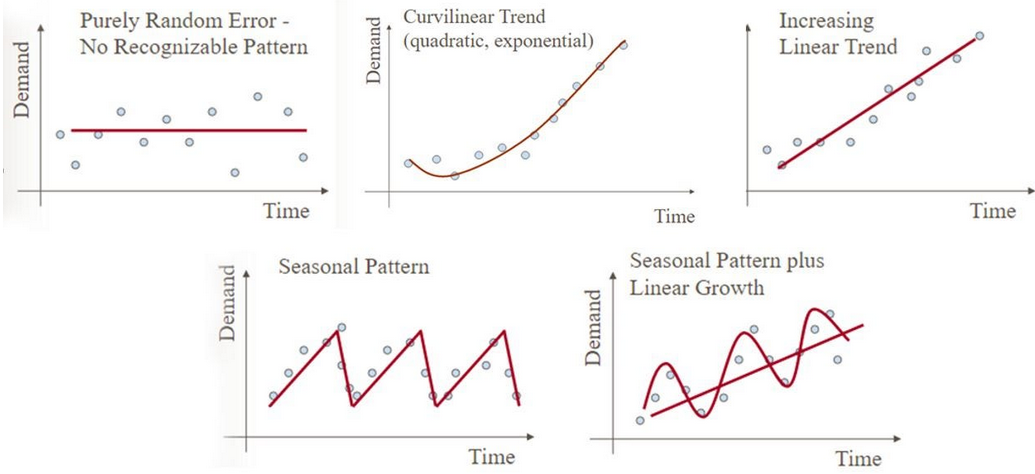

##### Las series de tiempo pueden presentar patrones diversos. En muchos casos un grafico puede mostrar una combinacion de los patrones presentados en la imagen anterior. Por esa razon es importante entender los componentes de las series de tiempo en detalle. 


##### **Componentes:**
##### Los valores que toma la variable de observcacion es la consecuencia de CINCO componentes (en algunas fuentes se presenta la variable aleatoria como dos vairables diferentes: residual y transiente), cuya actuacion conjunta da como resultado los valores medidos:
- **TENDENCIA REGULAR ('Trend'):** indica la marcha general y persistente del fenómeno observado, es una componente de la serie que refleja la evolución a largo plazo.
- **VARIACION ESTACIONAL ('seasonality'):** el movimiento periódico de corto plazo.
- **VARIACION CICLICA('Cyclic'):** el componente de la serie que recoge las oscilaciones periódicas de amplitud superior a un año. A diferencia de las variaciones estacionales, tiene un período y amplitud variables, pudiendo clasificarse como cíclicos, cuasicíclicos o recurrentes.
- **VARIACION ALEATORIA O RUIDO (Random: 'Residual'):** Accidental, de caracter erratico, que no muestra ninguna regularidad debido a fenomenos de caracter ocasional. 
- **VARIACION TRANSITORIA (Random: 'Transient events'):** eventos que aparecen de repente y decaen rapidamente. Accidental, de caracter erratico, debido a fenomenos aislados que pueden alterar el resto de los componentes de la serie de tiempo, y consigo el resto de la serie de tiempo.  
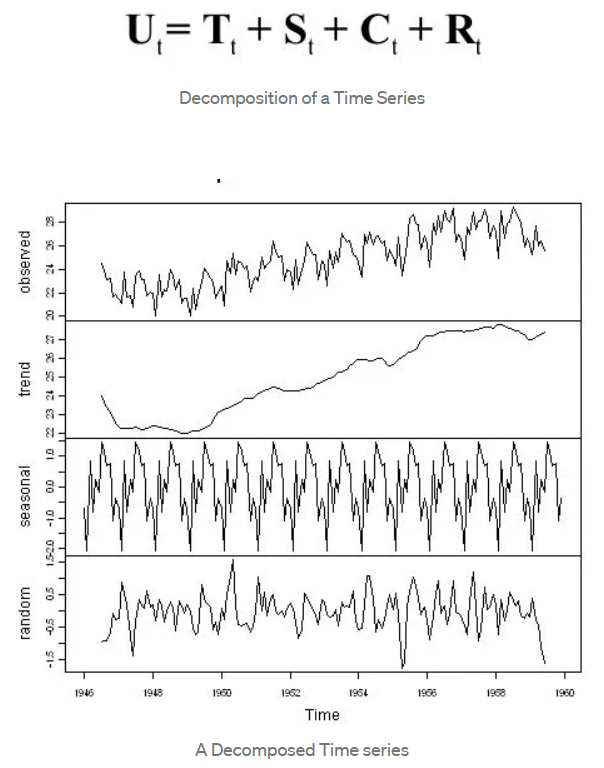






In [1]:
# Tratamiento de datos
# =============================================================

import pandas as pd
import numpy as np
import datetime

# Graficos
# =============================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns




## Data Wrangling

In [2]:
#Lectura y descripcion de la forma de la tabla y tipo de datos:
df_energia_hogar = pd.read_csv('C:/Users/javie/Jupiter Note/PROYECTO CODER/energydata_complete.csv')
print(df_energia_hogar.head(5))
df_energia_hogar.shape
df_energia_hogar.dtypes

               date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11-01-2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11-01-2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11-01-2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11-01-2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11-01-2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  


date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [3]:
#Date esta en formato string: transformo a datetime
df_energia_hogar['date'] = pd.to_datetime(df_energia_hogar['date'], format ='%d-%m-%Y %H:%M', errors='coerce')
#df_energia_hogar.info()
df_energia_hogar.columns

# Describo brevemente la variable de interes ('Appliances': consumo en Wh) y date, para tener un panorama  
# global del conjunto de datos a trabajar, el ancho de la serie de tiempo y los valores medios y otras estadisticas:
Describe_Wh = df_energia_hogar['Appliances'].describe()
display(Describe_Wh)
Describe_date = df_energia_hogar['date'].describe()
display(Describe_date)
display(df_energia_hogar)
df_energia_hogar.columns



count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

C:\Users\javie\AppData\Local\Temp\ipykernel_56964\1810116849.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Describe_date = df_energia_hogar['date'].describe()


count                   19735
unique                  19735
top       2016-01-11 17:00:00
freq                        1
first     2016-01-11 17:00:00
last      2016-05-27 18:00:00
Name: date, dtype: object

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [4]:
# Descripcion de valores Nulos
NaN_describe = df_energia_hogar.isnull().describe()
NaN_sum = df_energia_hogar.isna().sum()
display(NaN_describe)
display(NaN_sum)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735,19735,19735,19735,19735,19735,19735,19735,19735,...,19735,19735,19735,19735,19735,19735,19735,19735,19735,19735
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,19735,19735,19735,19735,19735,19735,19735,19735,19735,19735,...,19735,19735,19735,19735,19735,19735,19735,19735,19735,19735


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
#Elimino Variables Random (r1,r2)
del df_energia_hogar['rv1']
del df_energia_hogar['rv2']


In [6]:
#Segmento variables horarias segun dia, mes y horario.
df_energia_hogar['day'] = pd.to_datetime(df_energia_hogar['date']).dt.date
df_energia_hogar['time'] = pd.to_datetime(df_energia_hogar['date']).dt.time
df_energia_hogar['month'] = pd.to_datetime(df_energia_hogar['date']).dt.month 

#Defino dias de de la Semana y lo creo como variable: Puede ser util si quiero analizar si hay cambios considerables
# en el consumo de los fines de semana respecto al resto de los dias. 
df_energia_hogar['day of the week'] = df_energia_hogar.date.dt.day_name()
def set_values(row, value):
    return value[row]
map_dictionary ={'Monday' : "workday", 'Tuesday' :"workday", 'Wednesday' : "workday", 'Thursday' :"workday", 'Friday' : "workday",'Saturday':"weekend",'Sunday':"weekend"} 
df_energia_hogar['Type day'] = df_energia_hogar['day of the week'].apply(set_values, args =(map_dictionary, )) 

#Creo sobre el DS una nueva variable 'Type day', para saber si el dato fue medido en dia laboral o fin de semana
df_energia_hogar_workday = df_energia_hogar[df_energia_hogar['Type day'] != 'weekend'] 
df_energia_hogar_weekend = df_energia_hogar[df_energia_hogar['Type day'] != 'workday']

#df_energia_hogar.info()
df_energia_hogar.columns

# Nuevas Variables:
 # ['day', 'time', 'month', 'day of the week','Type day'],


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'day', 'time', 'month', 'day of the week',
       'Type day'],
      dtype='object')

In [7]:
df_energia_hogar.max()

date               2016-05-27 18:00:00
Appliances                        1080
lights                              70
T1                               26.26
RH_1                             63.36
T2                           29.856667
RH_2                         56.026667
T3                              29.236
RH_3                         50.163333
T4                                26.2
RH_4                             51.09
T5                              25.795
RH_5                         96.321667
T6                               28.29
RH_6                              99.9
T7                                26.0
RH_7                              51.4
T8                               27.23
RH_8                             58.78
T9                                24.5
RH_9                         53.326667
T_out                             26.1
Press_mm_hg                      772.3
RH_out                           100.0
Windspeed                         14.0
Visibility               

In [8]:
df_energia_hogar.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,time,month,day of the week,Type day
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,2016-01-11,17:00:00,1,Monday,workday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,2016-01-11,17:10:00,1,Monday,workday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,2016-01-11,17:20:00,1,Monday,workday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,2016-01-11,17:30:00,1,Monday,workday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,2016-01-11,17:40:00,1,Monday,workday


### Del Data Wrangling se tiene que:  ###
-No hay datos nulos.  
-La variable fecha se encuentra como objeto (string). Se transforma con datetime y se generan nuevas variables para el EDA (dia, hora, tipo de dia, etc)  



#  ANALISIS EXPLORATORIO DE DATOS (EDA)

### GRAFICOS INTERES SOBRE EL CONSUMO ('Appliance' en Wh)


Text(0.5, 0, 'Time')

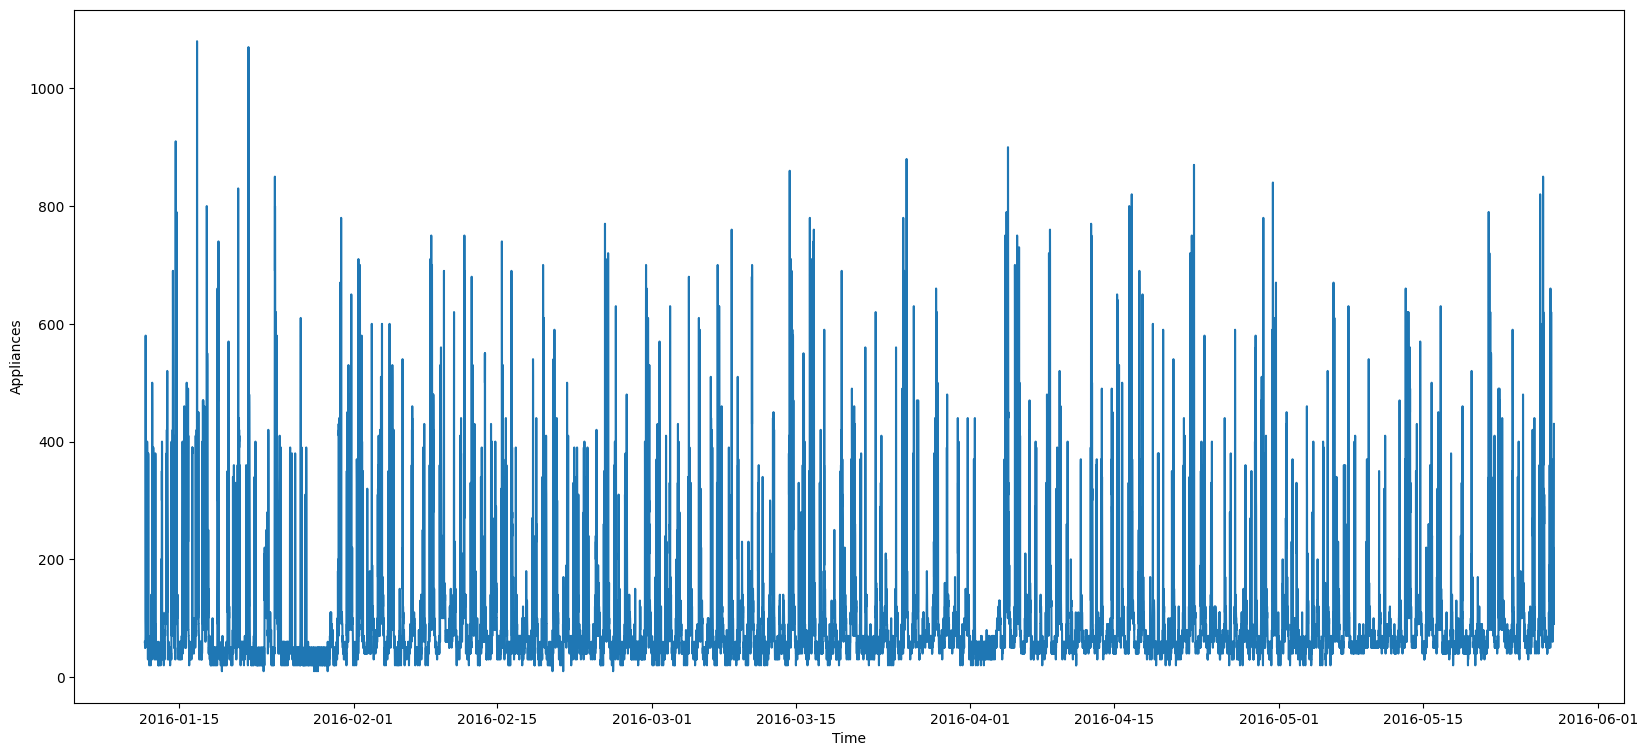

In [9]:
# Lineplot para observar la serie de tiempo del consumo
fig, ax = plt.subplots()
fig.set_size_inches((20,9))
sns.lineplot(data=df_energia_hogar, x="date", y="Appliances")
ax.set_ylabel('Appliances')
ax.set_xlabel('Time')
# plt.xlim(0, 200)



Text(0.5, 0, 'Time')

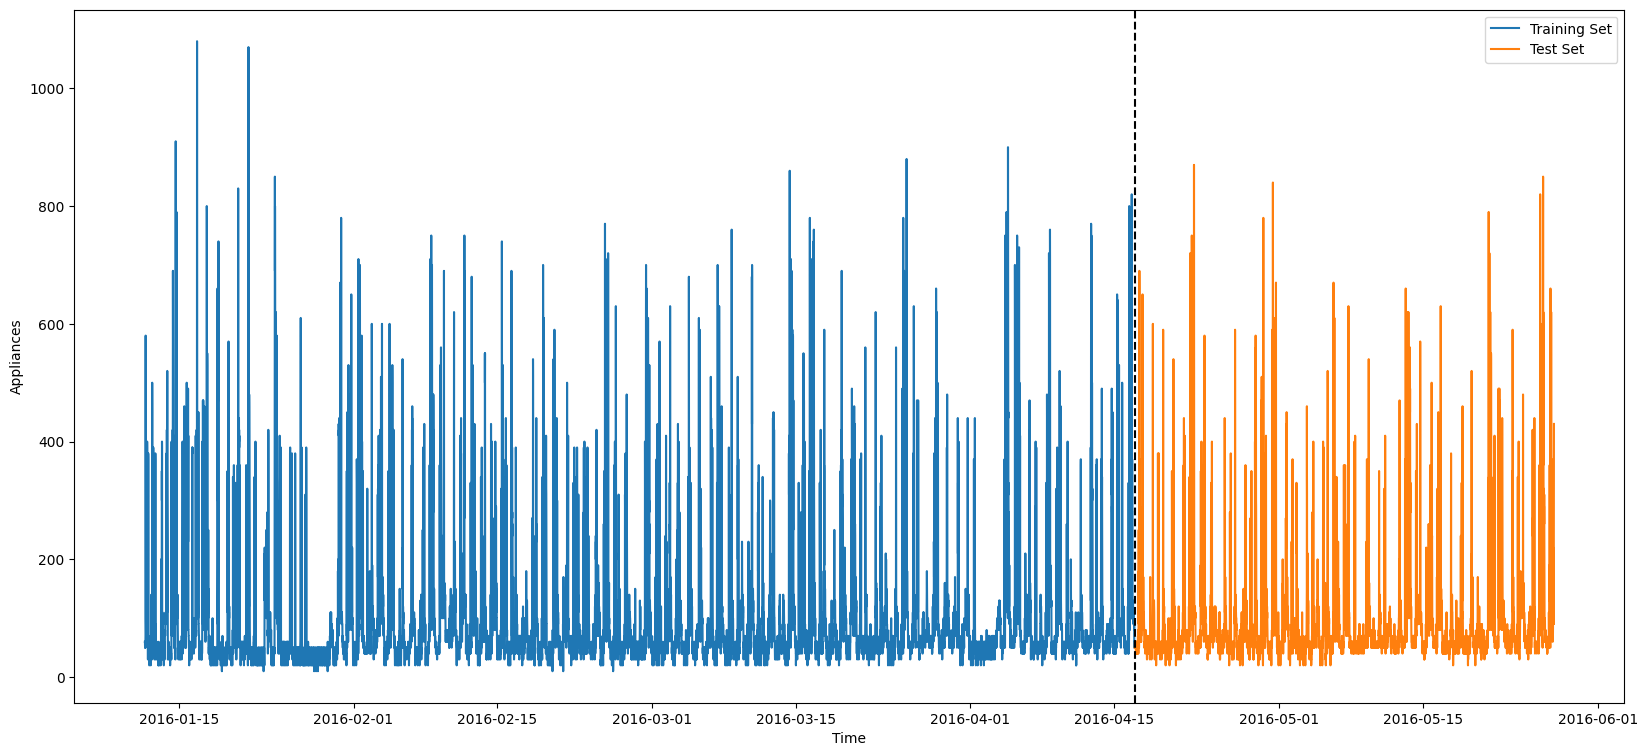

In [10]:
# Division del 70% de los primeros datos (conteo hasta index 13864: df_energia_hogar.iloc[[13864]])
# date: 	2016-04-16 23:40:00 (index 13864)

TRAIN = df_energia_hogar.loc[df_energia_hogar.index < 13864]
TEST = df_energia_hogar.loc[df_energia_hogar.index >= 13864]


fig, ax = plt.subplots()
fig.set_size_inches((20,9))
sns.lineplot(data=TRAIN, x="date", y="Appliances", label='Training Set')
sns.lineplot(data=TEST, x="date", y="Appliances", label='Test Set')
ax.set_ylabel('Appliances')
ax.axvline(pd.to_datetime('2016-04-16 23:40:00'), color='black', ls='--')
ax.set_xlabel('Time')
# plt.xlim(0, 200)



## El problema con esta division de datos es que no se tienen suficientes datos para observar si durante abril y mayo ocurriran variaciones estacionales o ciclicas, por lo que puede llevar a un sesgo analizando el intervalo de tiempo disponible.  
## Por este motivo, se hara una division aleatoria de datos posteriormente para el entrenamiento de los modelos. 


(0.0, 200.0)

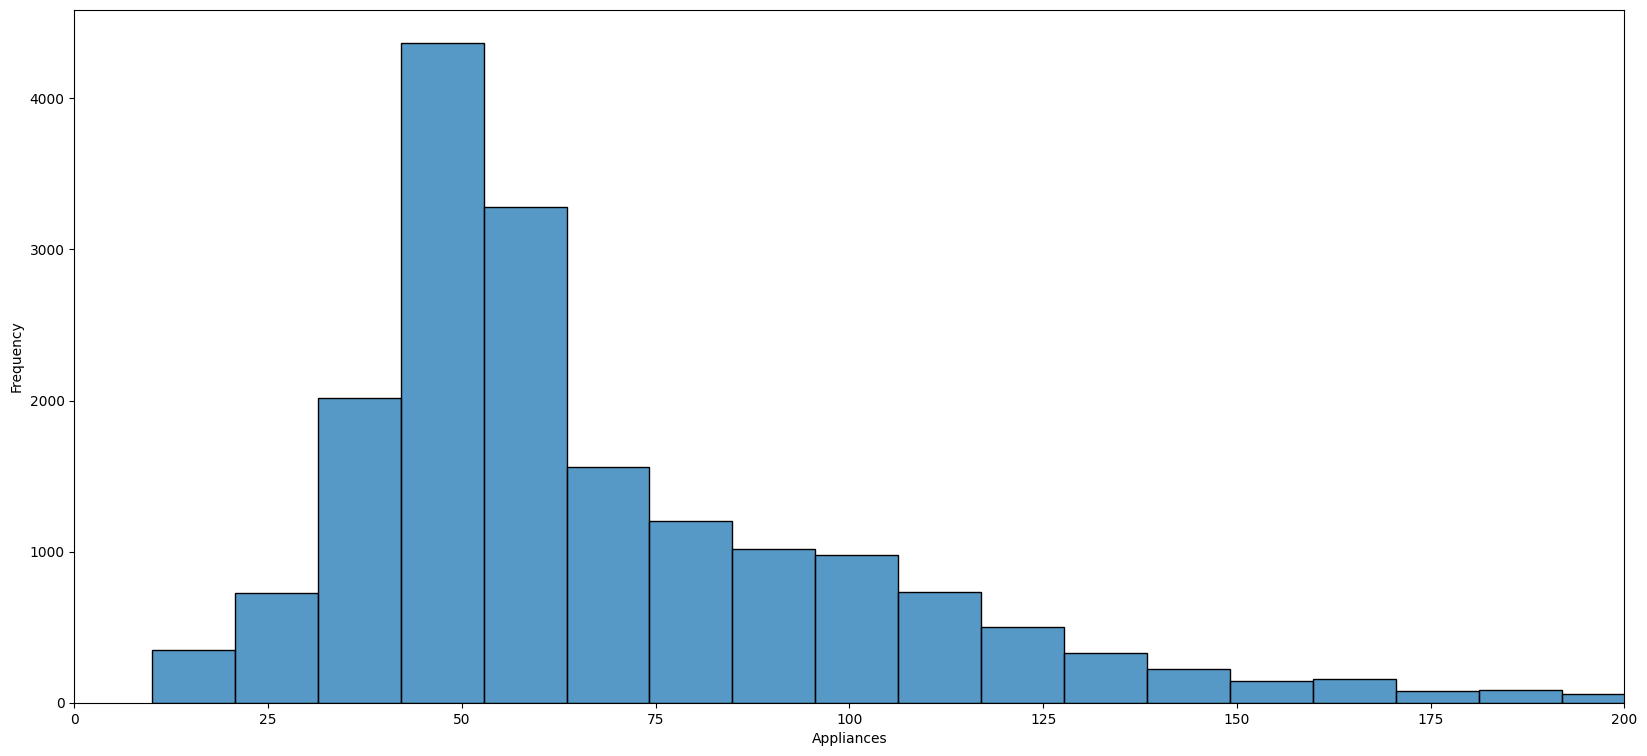

In [11]:
# Histograma del total de mediciones de consumo:  
fig, ax = plt.subplots()
fig.set_size_inches((20,9))
sns.histplot(data=df_energia_hogar, x="Appliances", bins=100)
ax.set_ylabel('Frequency')
ax.set_xlabel('Appliances')
plt.xlim(0, 200)

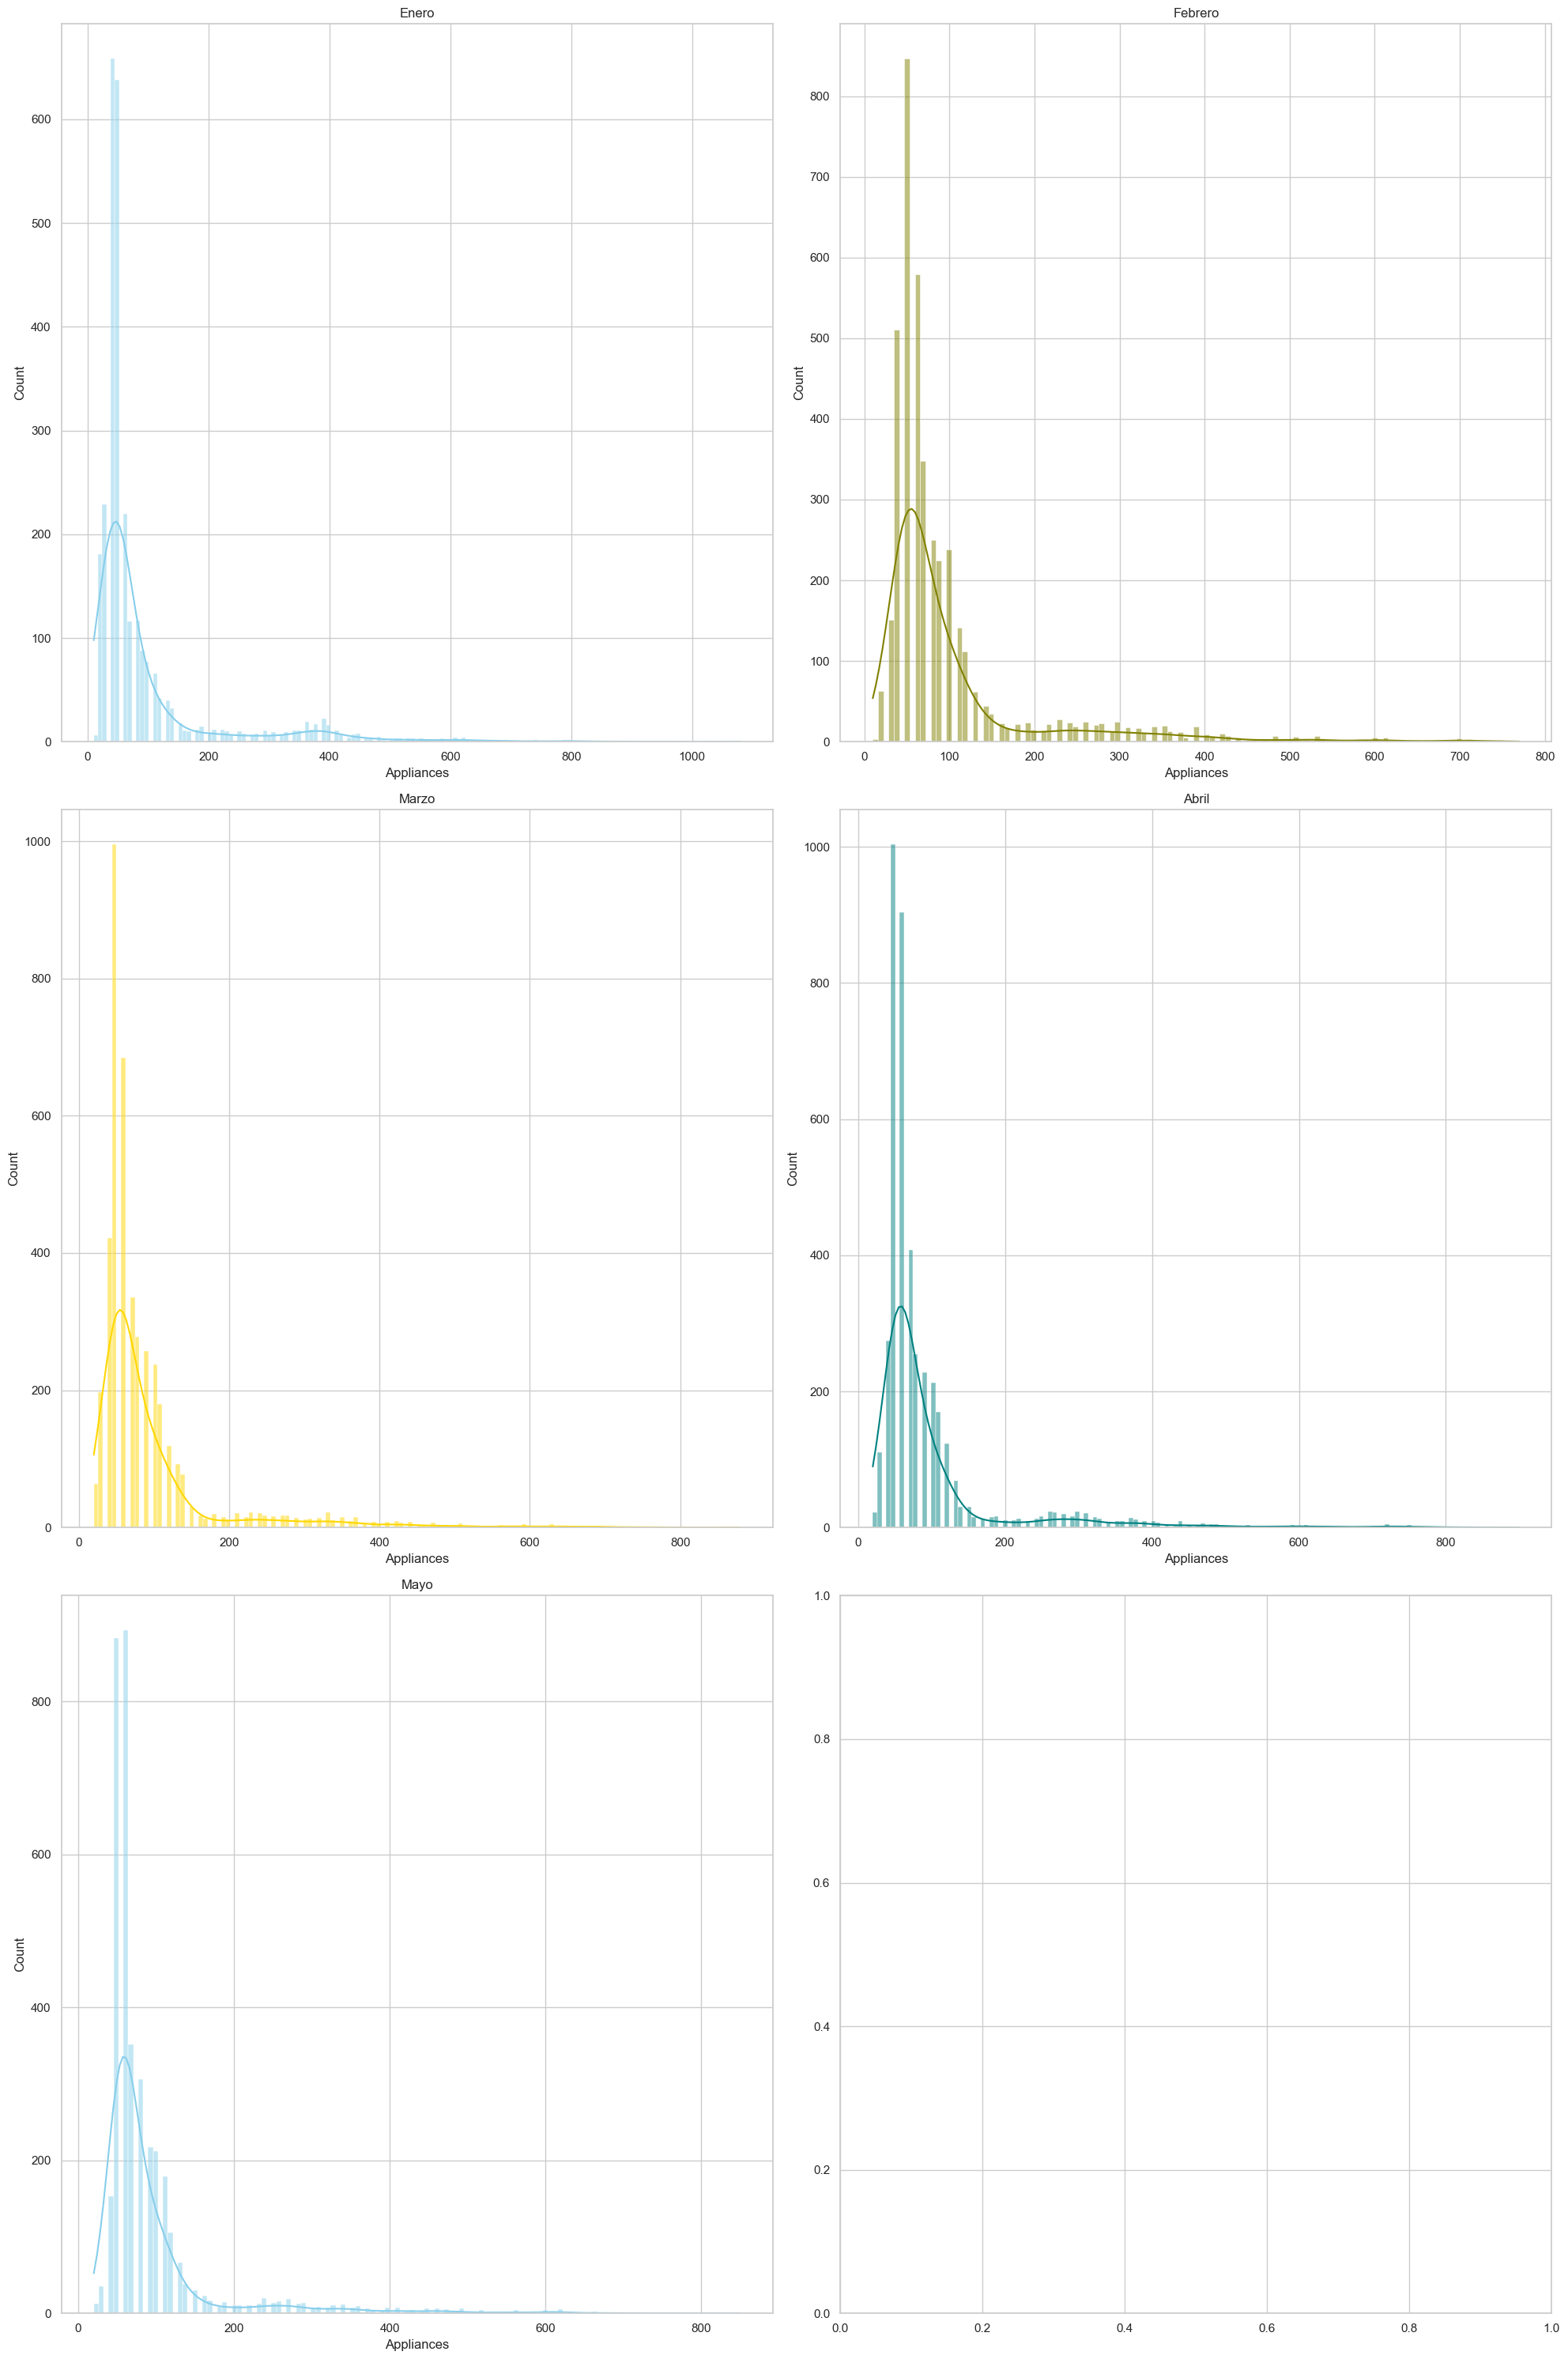

In [12]:
# Histogramas mensuales:  
df_month = df_energia_hogar[['Appliances','month']]
# df_ene = df_month.loc[(df_energia_hogar['month'] == 1)]
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (20,30))
sns.histplot(data=df_month.loc[(df_energia_hogar['month'] == 1)], x="Appliances", kde=True, color="skyblue", ax=axs[0,0]).set(title='Enero')
sns.histplot(data=df_month.loc[(df_energia_hogar['month'] == 2)], x="Appliances", kde=True, color="olive", ax=axs[0,1]).set(title='Febrero')
sns.histplot(data=df_month.loc[(df_energia_hogar['month'] == 3)], x="Appliances", kde=True, color="gold", ax=axs[1,0]).set(title='Marzo')
sns.histplot(data=df_month.loc[(df_energia_hogar['month'] == 4)], x="Appliances", kde=True, color="teal", ax=axs[1,1]).set(title='Abril')
sns.histplot(data=df_month.loc[(df_energia_hogar['month'] == 5)], x="Appliances", kde=True, color="skyblue", ax=axs[2,0]).set(title='Mayo')
fig.tight_layout()


(0.0, 200.0)

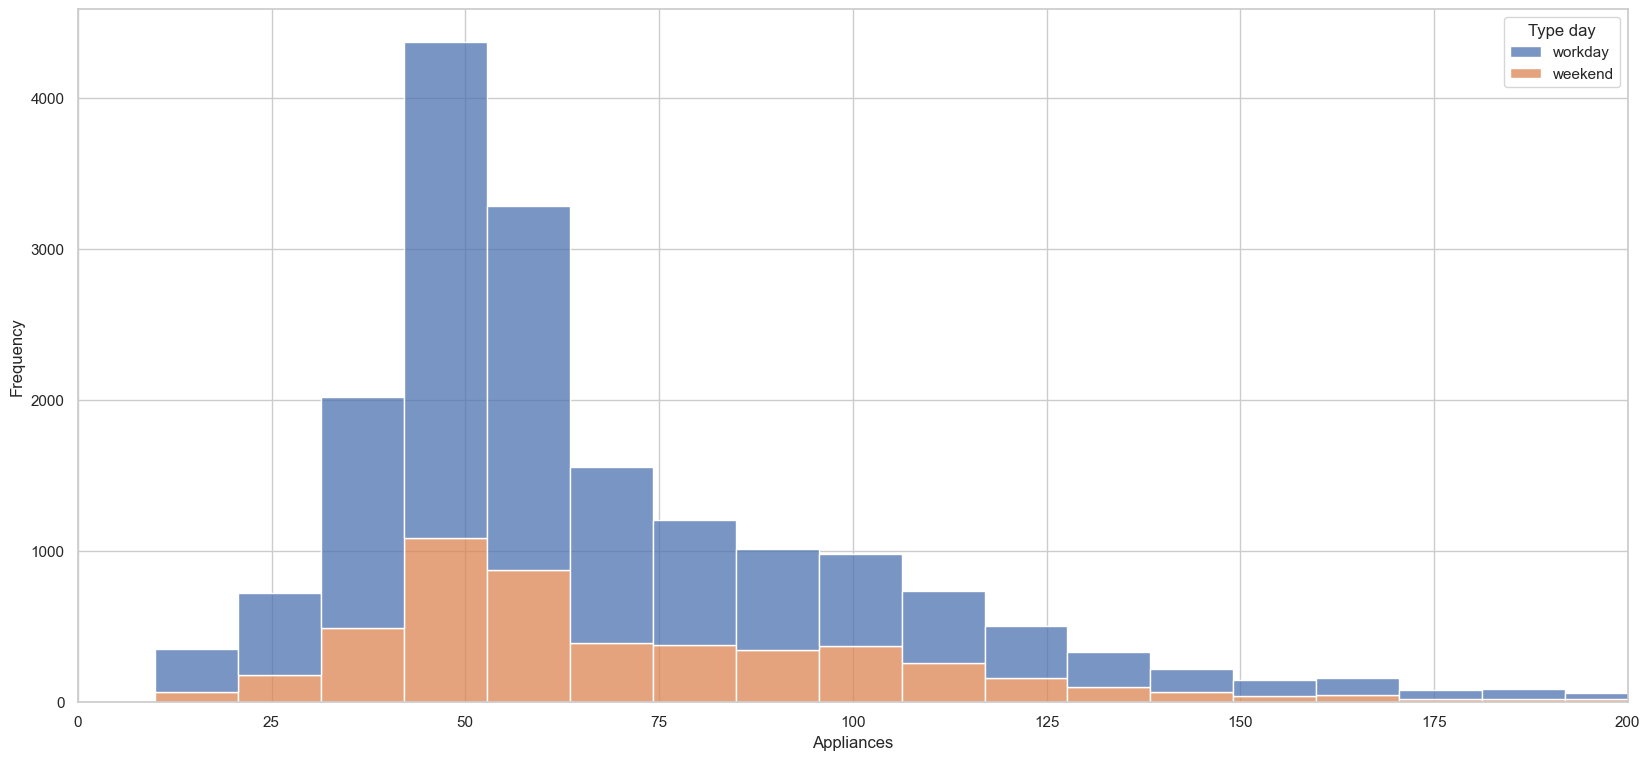

In [13]:
# Histogramas de consumo tipo de dia de la semana (laboral o fin de semana):  
fig, ax = plt.subplots()
fig.set_size_inches((20,9))
sns.histplot(data=df_energia_hogar, x="Appliances", hue="Type day", multiple="stack",bins=100)
ax.set_ylabel('Frequency')
ax.set_xlabel('Appliances')
plt.xlim(0, 200)

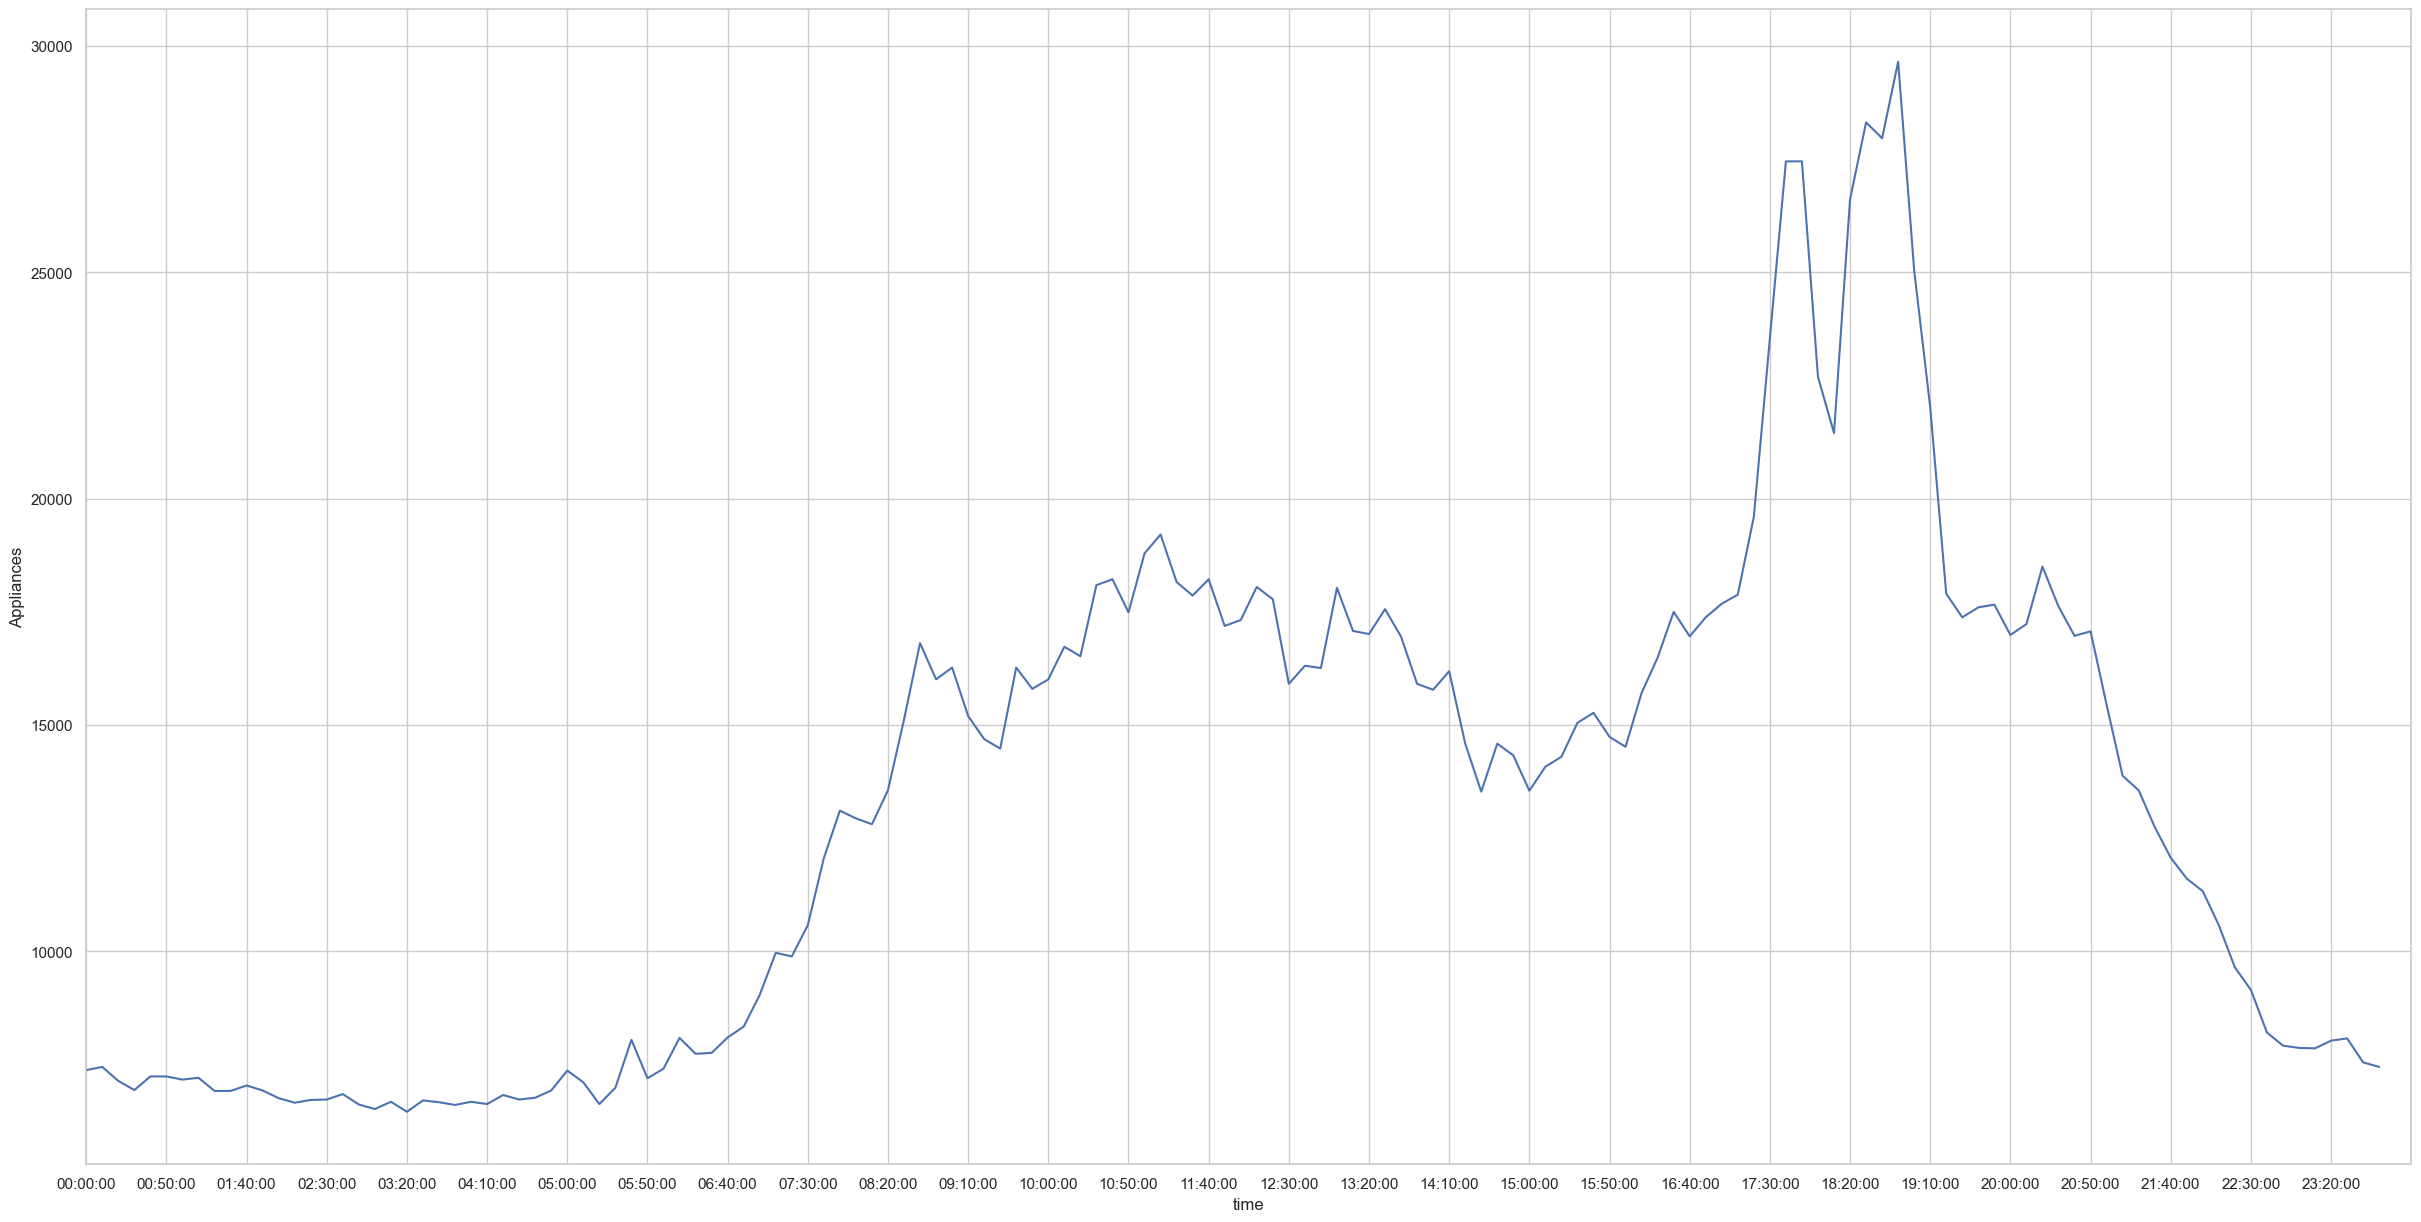

In [14]:
# Como es la variabilidad de los consumos en funcion del tiempo, que horarios presentan mayor consumo?
import datetime
df_time = df_energia_hogar[['Appliances','time']]
df_Time_Total_Appliances = df_time.groupby(by=["time"], dropna=False).sum().reset_index()
#Grafico consumos totales por hora durante el periodo de muestreo. Coincide con el maximo horario 
fig1, ax1 = plt.subplots()
fig1.set_size_inches((30,15)) 
sns.lineplot(data=df_Time_Total_Appliances, x=df_Time_Total_Appliances['time'].astype(str), y="Appliances")
ax1.set_xlim(0,145)
import matplotlib.ticker as ticker
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))

# Recordar que el maximo se registró el 27 de Mayo de 2016 a las 18:00:00

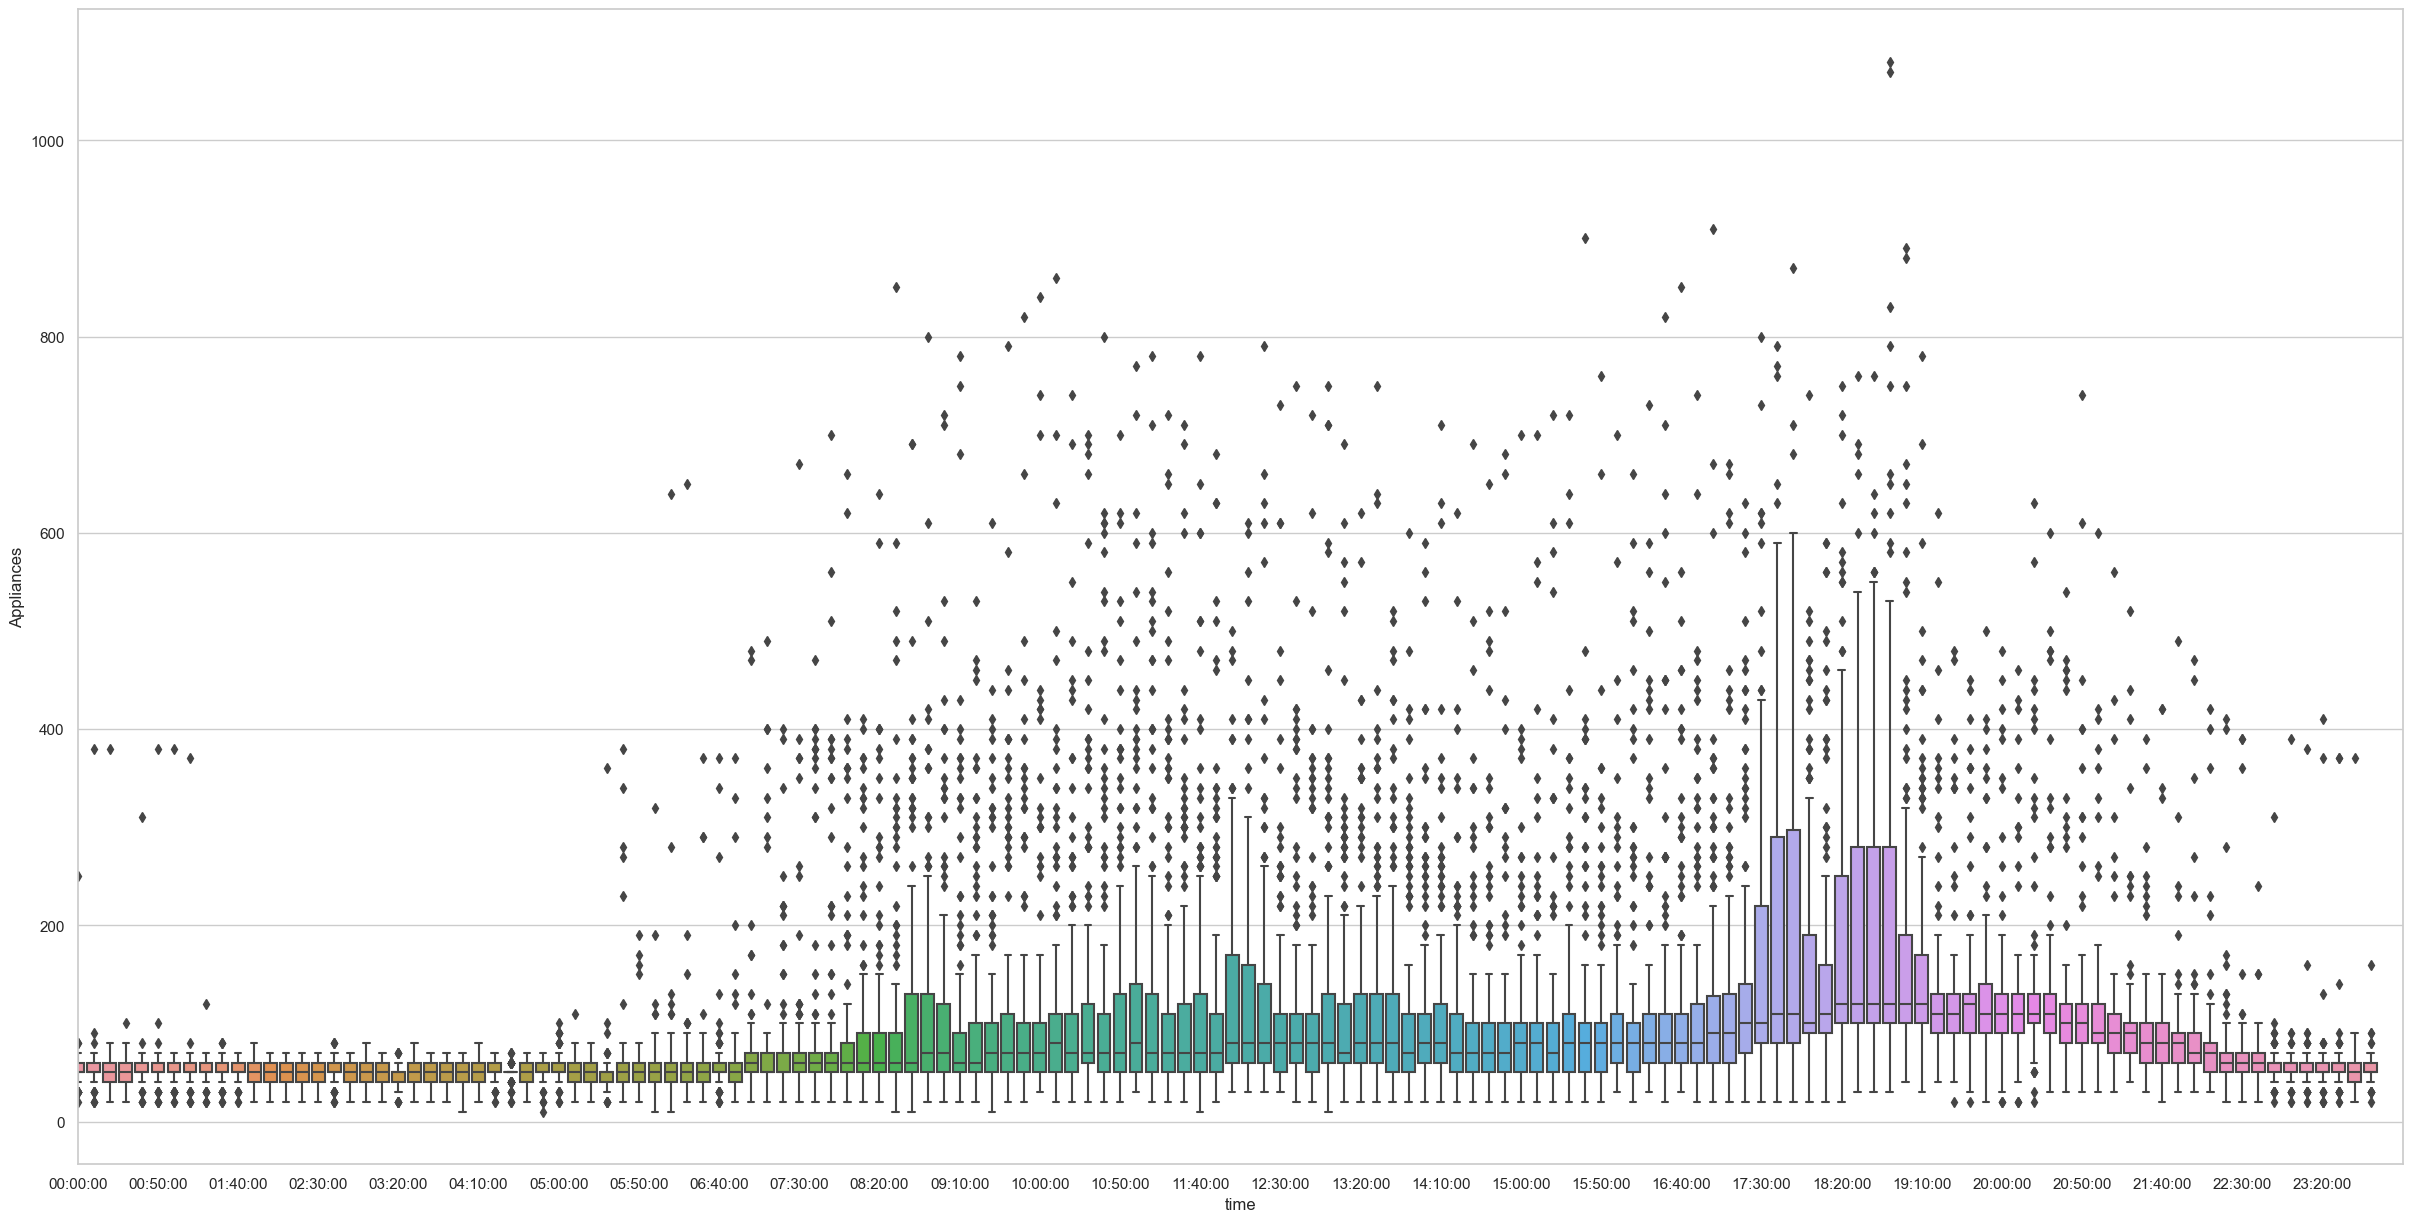

In [15]:
# Como es la variabilidad de los consumos en funcion del tiempo, que horarios presentan mayor consumo?

# Fijar orden horario: dado que el dataset comienza a las 17 pm
orden_horario = df_energia_hogar.groupby(by=["time"])["Appliances"].median().iloc[::1].index
orden_horario

fig1, ax1 = plt.subplots()
fig1.set_size_inches((30,15)) 
sns.boxplot(data=df_energia_hogar, x=df_energia_hogar['time'], y="Appliances",  order=orden_horario)
ax1.set_xlim(0,145)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))

In [16]:
df_Time_Total_Appliances.describe()

,Appliances
count,144.000000
mean,13388.958333
std,5644.538758
min,6460.000000
25%,7450.000000
50%,14315.000000
75%,17200.000000
max,29650.000000


En el Lineplot de consumo total horario se acumula el total de consumo (independientemente del dia y estacion) por cada hora de muestreo. De este modo se puede observar que los picos de consumo se localizan entre las 17:00 y las 19:10 hs.   

Tambien se ve una gran acumulacion de consumo durante la mañana y durante el mediodia pero sin presencia de picos pronunciados, mantiene una media de 16000 Wh acumulados hasta el pico de las  17 hs donde se alcanza un maximo de 29650 Wh

Descomponiendo aun mas el analisis horario en un Boxplot, se observa que los consumos altos tambien se asocian a periodos de alta variabilidad en terminos del desvio estandar de la variable y la presencia de dato atipicos. 

Text(0.5, 1.0, 'Appliances vs Month')

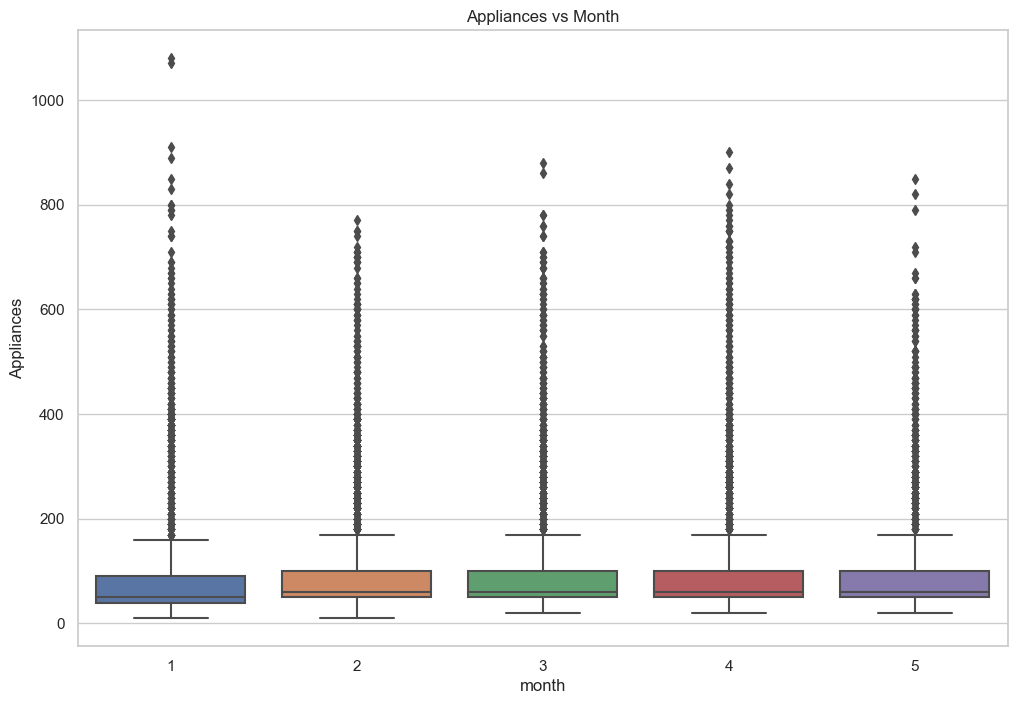

In [17]:
# Boxplot respecto a los meses medidos (Enero a Mayo de 2016)
fig, ax = plt.subplots()
fig.set_size_inches((12,8))
sns.boxplot(x='month',y='Appliances',data=df_energia_hogar,ax=ax)
ax.set_ylabel('Appliances')
ax.set_xlabel('month')
ax.set_title('Appliances vs Month')

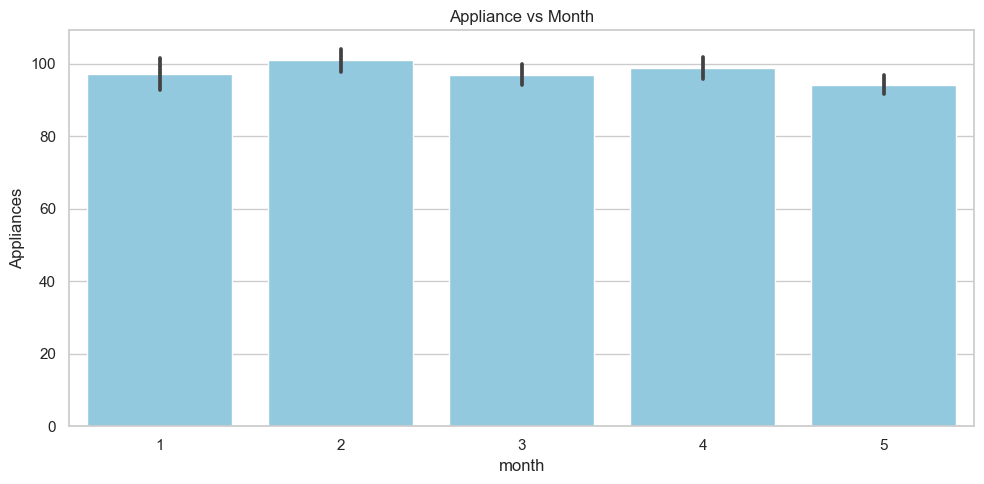

In [18]:
# BARPLOT POR MES

sns.set(style="whitegrid")  
fig,axs = plt.subplots(figsize = (10,5))
sns.barplot(data=df_energia_hogar, x="month",y="Appliances" , color="skyblue").set(title='Appliance vs Month')
fig.tight_layout()


### HEATMAP Y CORRELACIONES


<AxesSubplot: >

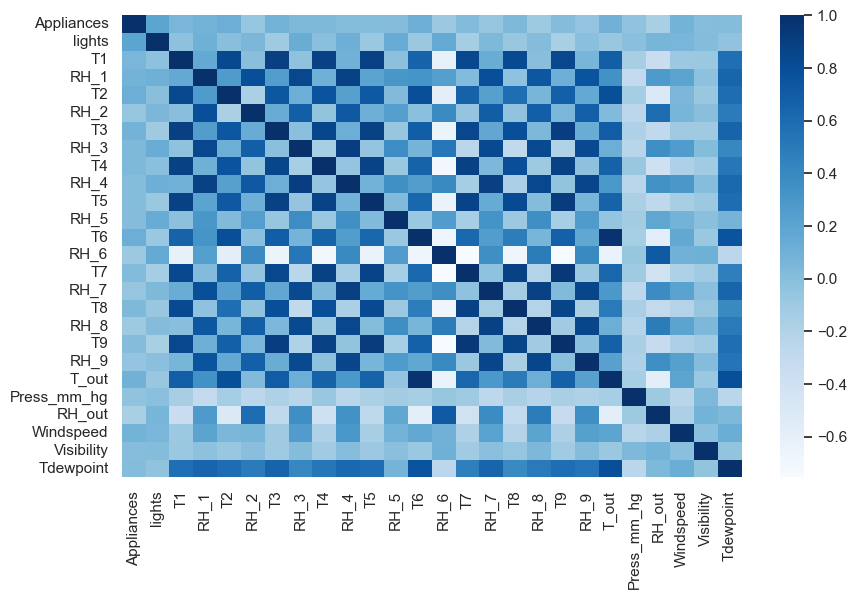

In [19]:
# Heatmap de la libreria Seaborn:  

df_para_correlacion=df_energia_hogar.drop(['date', 'day', 'time', 'month', 'day of the week', 'Type day'], axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(data=df_para_correlacion.corr(), cmap='Blues')


In [20]:
# Resumen numerico de las correlaciones halladas en el heatmap: 
df_para_correlacion.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015357
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.071458,0.012915,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.825413,-0.006441,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,-0.030053,0.736196,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.578191,0.068534,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,-0.041023,0.679777,0.054544,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.005368,0.499154
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.795283,0.044427,0.901324,0.134602,0.699420,-0.189974,-0.281718,-0.100776,-0.102310,0.645909
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.283228,0.828822,-0.195270,0.833538,0.118237,-0.233274,0.356192,0.263188,0.017041,0.414398
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.796256,-0.095192,0.889439,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,-0.104768,0.519504
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.167066,0.847259,-0.044518,0.856591,0.293307,-0.250748,0.336813,0.300192,0.002636,0.616508


In [21]:
# Correlaciones mas importantes: 

def parejas(df_para_correlacion):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df_para_correlacion.columns
    for i in range(0, df_para_correlacion.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def correlaciones(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Correlaciones mas grandes")
print(correlaciones(df_para_correlacion, 25)) # Saquemos el top 10

Correlaciones mas grandes
T6    T_out    0.974778
T7    T9       0.944776
T5    T9       0.911055
T3    T9       0.901324
RH_3  RH_4     0.898978
RH_4  RH_7     0.894301
T1    T3       0.892402
T4    T9       0.889439
T3    T5       0.888169
T1    T5       0.885247
RH_7  RH_8     0.883984
T7    T8       0.882123
RH_1  RH_4     0.880359
T4    T7       0.877763
T1    T4       0.877001
T4    T5       0.871813
T5    T7       0.870624
T8    T9       0.869338
RH_7  RH_9     0.858686
RH_4  RH_9     0.856591
RH_8  RH_9     0.855812
T3    T4       0.852778
      T7       0.847374
RH_4  RH_8     0.847259
T1    T9       0.844777
dtype: float64



### INSIGHTS DEL EDA  

#### A partir de la funcion describe y de los graficos efectuados (histogramas, boxplot y de linea) se puede decir que:   

#### -Los valores mas frecuentes de consumo total en Wh (independientemente del mes) se encuentran entre 40-70 Wh, pero su valor medio es de 97,69 Wh, esto se debe a la dispersion que en algunos casos registra valores dos ordenes de magnitud mayores a la media de esta variable, siendo su desvio estandar de 102,52 Wh, y valor maximo en 1080 Wh.

#### -No hay variacion significativa los fines de semana respecto a los dias laborables. En terminos de la media existe un consumo levemente mas alto los fines de semana (10 Wh mas), que puede deberse a una permanencia mayor en la vivienda respecto a los dias laborables.  

#### -No se han observado variaciones estacionales significativas, dado que tanto en los boxplot mensuales como en los histogramas el pico se mantiene en el mismo rango de valores.   
#### Analizando tanto el boxplot como el barplot por mes se observa que los outliers son relevantes y afectan al consumo total considerablemente 

#### -Si se toma el grafico de linea horario considerando la suma de los consumos registrados en la hora de medicion durante todo el periodo de muestreo, se ve que el consumo se mantiene estable la mayor parte del dia con una media de 16000 Wh acumulados hasta el pico de las  17 hs donde se alcanza un maximo de 29650 Wh (localizado entre las 17:00 hs y las 19:10 hs)

#### -Por el ultimo barplot realizado para el consumo total durante los meses de registro, se observa una gran similitud en los acumulados mensuales, por lo que cualquier estrategia de reduccion de consumo en los horarios de mayor produccion, generaria una reduccion de la misma proporcionalidad para cada uno de los meses. 

####  Existen correlaciones posivas entre el consumo y el resto de variables. De los resultados del Heatmap y el resumen numerico de correlaciones se observan varias correlaciones positivas entre Appliances pero con valores bajos:   
            -Lights (+0.19)  
            -T2 (+0.12)  
            -T6 (+0.12)  
            -T_out(+0.10)  
            -Windspeed (+0.09)    
####  No se puede decir que exista una correlacion lineal conesta variable. Si las hay entre algunas temperaturas, lo cual puede ser explicado por la contigüidad entre dos ambientes, o un ambiente con respecto al exterior de la vivienda.  



## Analisis de Correlaciones: reduccion de variables que transfieren la misma informacion  

Para hacer más ligera la exploración de los datos, se comienza identificando las variables más altamente correlacionadas para removerlas del análisis (con correlaciones superiores al 0.98).

In [22]:
## Esta parte argumenta las iteraciones de remocion de variables: segunda, tercera y cuarta.

c = df_para_correlacion.corr(numeric_only=True).abs()
s = c.unstack()
correlacion=pd.DataFrame(s)
correlacion.columns=["Correlacion"]
correlaciones_max=correlacion.query("Correlacion>0.93 & Correlacion!=1") # Considero eliminacion de variables con correlacion por encima de 0.93
                                                                         # No es trasladable a otros casos, porque el intecambio entre ambientes no necesariamente es el mismo
                                                                         # Solo para este caso se procede a eliminar T_6 y T_       

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(correlaciones_max)

             Correlacion
T6    T_out        0.975
T7    T9           0.945
T9    T7           0.945
T_out T6           0.975


### Resumen de correlaciones:

- Se observa que T6 (Temperatura afuera de la casa) y T_Out (temperatura ambiental del servicio meteorologico local), estan altamente correlacionadas linealmente, por lo que podemos decir que ofrecen la misma informacion. Eliminar T_6, permite simplificar por un lado el modelo, reduciendo la dimensionalidad del df, y por otro lado, ahorrar el uso de un sensor.
- Por otro lado T9 (habitacion) y T7 (lavanderia) tambien están altamente correlacionadas. Conservo T_7 dado que tiene informacion de la temperatura que alcanza una sala con aparatos de alto consumo. 

In [23]:
df_energia_hogar=df_energia_hogar.drop(['T6','T9'],axis=1)
df_energia_hogar.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,time,month,day of the week,Type day
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,2016-01-11,17:00:00,1,Monday,workday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,2016-01-11,17:10:00,1,Monday,workday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,2016-01-11,17:20:00,1,Monday,workday
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,2016-01-11,17:30:00,1,Monday,workday
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,2016-01-11,17:40:00,1,Monday,workday


### PREPROCESSING AND FEATURE SELECTION

### PREPROCESSING:

#### **Estandarización y escalado de variables numéricas**

#### La magnitud de la varianza y la escala de las variables pueden influir en los modelos. Muchos son sensibles a esto (SVM, redes neuronales, etc)


In [24]:
# 1) Divido Conjunto de Entrenamiento y Prueba
# =============================================================
import sklearn
from sklearn.model_selection import train_test_split


# Divido entre la variable dependiente (la que quiero predecir) y el resto de las variables
# Esto me dará el conjunto total de datos para el modelo
x = df_energia_hogar.drop(columns=['Appliances', 'date'])
y = df_energia_hogar['Appliances']


X_train, X_test, y_train, y_test = train_test_split(x,y,
            train_size   = 0.3,
                random_state = 25,
                    shuffle = True)




Text(0.5, 0, 'Time')

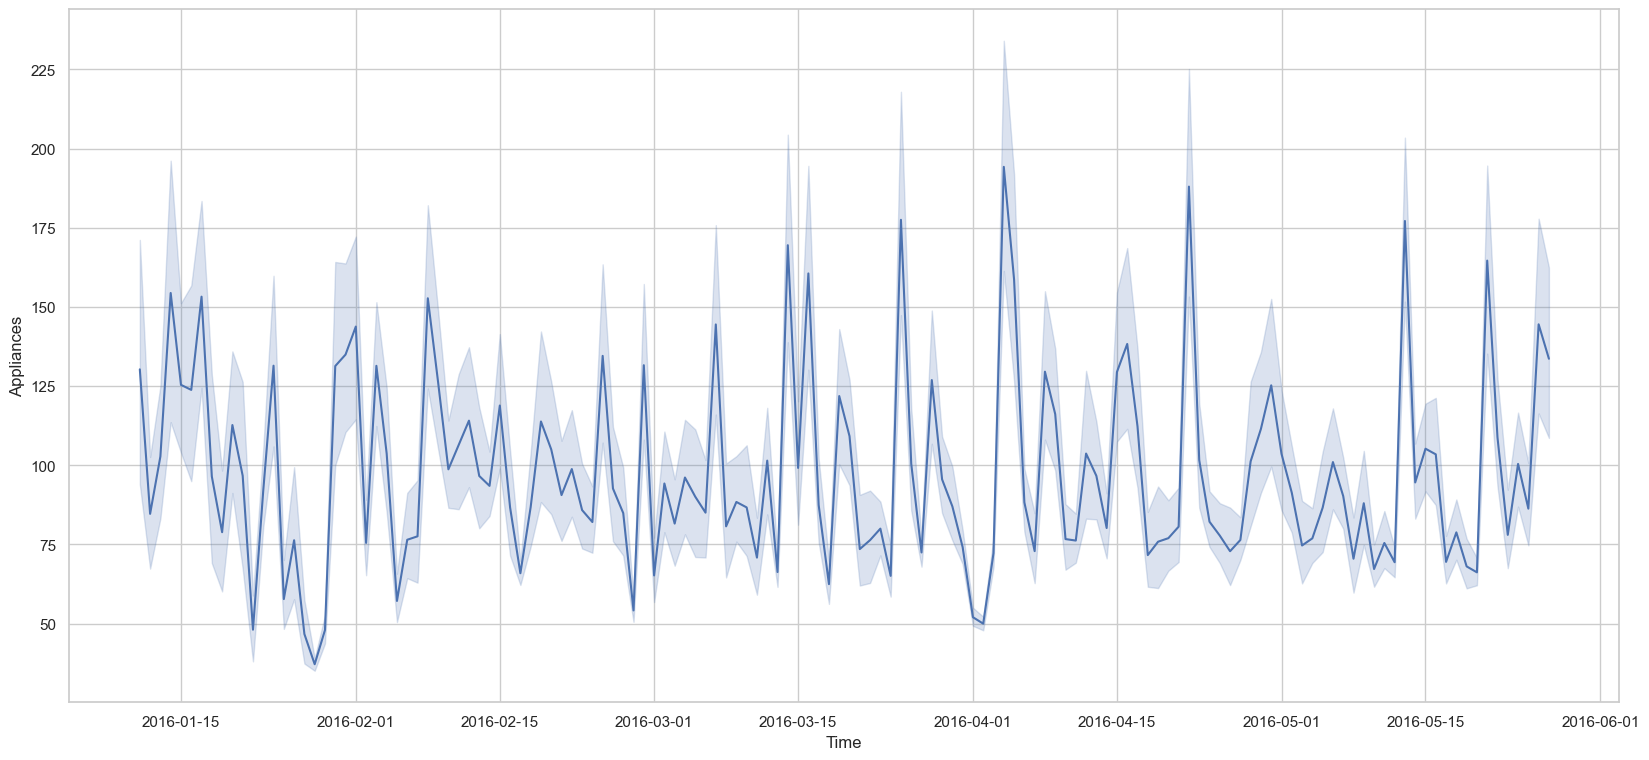

In [25]:
# Lineplot del conjunto de prueba que luego voy a comparar con los resultados de cada algoritmo 
fig, ax = plt.subplots()
fig.set_size_inches((20,9))
sns.lineplot(data=df_energia_hogar, x=X_test['day'], y=y_test)
ax.set_ylabel('Appliances')
ax.set_xlabel('Time')
# plt.xlim(0, 200)

#luego agrego los demas graficos en la misma figura tal como se hizo con la primer particion de la serie de tiempo...
# sns.lineplot(data=TRAIN, x="date", y="Appliances", label='Training Set')
# sns.lineplot(data=TEST, x="date", y="Appliances", label='Test Set')

In [26]:
# Pipelines y seleccion de las variables por tipo
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('scaler', StandardScaler())
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")


In [27]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)
X_train_prep.head(3)


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,time_23:50:00,day of the week_Friday,day of the week_Monday,day of the week_Saturday,day of the week_Sunday,day of the week_Thursday,day of the week_Tuesday,day of the week_Wednesday,Type day_weekend,Type day_workday
18821,-0.472716,0.823461,2.553260,2.243654,0.793063,1.108660,1.914788,1.321477,1.900597,1.589941,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19538,-0.472716,1.200979,0.877647,3.262546,-1.099707,1.326398,0.170194,1.650185,0.847495,0.983088,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9388,0.816312,0.603243,-1.234014,-0.035566,-0.854220,0.419998,-1.149091,0.494777,-1.311324,-0.487573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [28]:
# Genero un diagrama para los pipelines de la transformacion de variables num y cat
# =================================================================================
from sklearn import set_config
set_config(display='diagram')

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
                                  'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'RH_6',
                                  'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out',
                                  'Press_mm_hg', 'RH_out', 'Windspeed',
                                  'Visibility', 'Tdewpoint', 'month']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['day', 'time', 'day of the week',
                                  'Type day'])],
                  verbose_feature_names_out=False)

#### **Seleccion de Modelos de regresion para prediccion de la serie de tiempo:**

#### **MACHINE LEARNING MODELS:**

##### 1. KNeighborsRegressor
##### 2. Ridge
##### 3. RandomForestRegressor
##### 4. Gradient Boosting Trees

#### **DEEP LEARNING MODELS:**

##### 5. LSTM 
-
-



### **1. KNeighborsRegressor** 

In [29]:
import multiprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor


# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_KNR = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions_KNR = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid_KNR = RandomizedSearchCV(
        estimator  = pipe_KNR,
        param_distributions = param_distributions_KNR,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid_KNR.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid_KNR.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)



,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
12,7,-89.365878,3.396083,-76.535534,0.711427


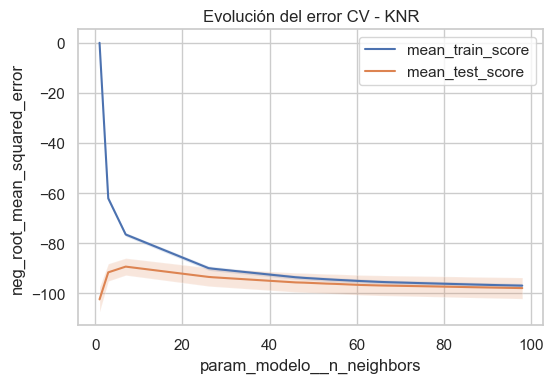

In [30]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid_KNR.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV - KNR')
ax.set_ylabel(metrica);

In [31]:
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid_KNR.fit(X = X_train, y = y_train)

In [32]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid_KNR.best_params_} : {grid_KNR.best_score_} ({grid_KNR.scoring})")



-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__n_neighbors': 7} : -89.2206165294888 (neg_root_mean_squared_error)


In [33]:
# Predcciones del modelo KNN
predicciones_KNR = grid_KNR.predict(X_test)

# Se crea un dataframe con las predicciones y el valor real
df_predicciones_KNR = pd.DataFrame({'Appliances' : y_test, 'prediccion_KNR' : predicciones_KNR})
df_predicciones_KNR.head()



,Appliances,prediccion_KNR
7624,260,211.428571
9021,310,155.714286
5074,50,110.000000
14760,50,58.571429
5921,400,118.571429


### **2. Ridge**

In [34]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_RIDGE = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions_RIDGE = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid_RIDGE = RandomizedSearchCV(
        estimator  = pipe_RIDGE,
        param_distributions = param_distributions_RIDGE,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid_RIDGE.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid_RIDGE.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)



,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
10,3.396739,-90.726969,4.128189,-85.650676,1.01555


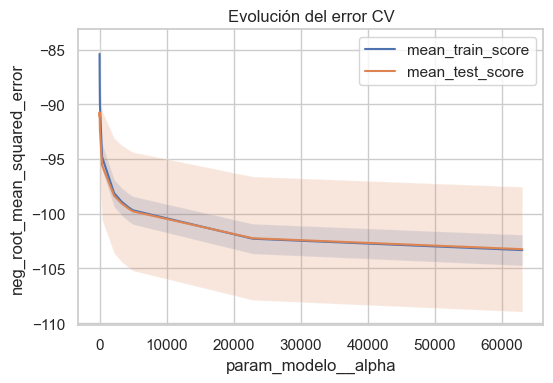

In [35]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid_RIDGE.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel(metrica);

In [36]:
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid_RIDGE.fit(X = X_train, y = y_train)

In [37]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid_RIDGE.best_params_} : {grid_RIDGE.best_score_} ({grid_RIDGE.scoring})")



-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__alpha': 3.3967385822722096} : -90.80596739181966 (neg_root_mean_squared_error)


In [38]:
# Predcciones del modelo RIDGE
predicciones_RIDGE = grid_RIDGE.predict(X_test)

# Se crea un dataframe con las predicciones y el valor real
df_predicciones_RIDGE = pd.DataFrame({'Appliances' : y_test, 'prediccion_RIDGE' : predicciones_RIDGE})
df_predicciones_RIDGE.head()



,Appliances,prediccion_RIDGE
7624,260,121.213765
9021,310,180.275741
5074,50,97.673042
14760,50,88.609663
5921,400,141.858147


### **3. Random Forest Regressor**

In [39]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_RFR = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])


# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions_RFR = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid_RFR = RandomizedSearchCV(
        estimator  = pipe_RFR,
        param_distributions = param_distributions_RFR,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid_RFR.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid_RFR.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)


,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
10,100,7,None,-82.528403,4.970121,-30.98714,0.446226


In [40]:
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid_RFR.fit(X = X_train, y = y_train)

In [41]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid_RFR.best_params_} : {grid_RFR.best_score_} ({grid_RFR.scoring})")


-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__n_estimators': 100, 'modelo__max_features': 7, 'modelo__max_depth': None} : -83.21269706868155 (neg_root_mean_squared_error)


In [42]:
# Predcciones del modelo Random Forest Regressor
predicciones_RFR = grid_RFR.predict(X_test)

# Se crea un dataframe con las predicciones y el valor real
df_predicciones_RFR = pd.DataFrame({'Appliances' : y_test, 'prediccion_RFR' : predicciones_RFR})
df_predicciones_RFR.head()


,Appliances,prediccion_RFR
7624,260,183.5
9021,310,277.9
5074,50,67.6
14760,50,62.0
5921,400,139.2


### **4. Gradient Boosting Trees**

In [43]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor


# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe_GBR = Pipeline([('preprocessing', preprocessor),
                 ('modelo', GradientBoostingRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions_GBR = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': [3, 5, 7, 1.0],
    'modelo__max_depth'   : [None, 3, 5, 10, 20],
    'modelo__subsample'   : [0.5,0.7, 1]
}

# Búsqueda random grid
grid_GBR = RandomizedSearchCV(
        estimator  = pipe_GBR,
        param_distributions = param_distributions_GBR,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid_GBR.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid_GBR.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__subsample,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
13,1,1000,5,None,-82.533109,3.530954,-1.484830e-08,5.251405e-11


In [44]:
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid_GBR.fit(X = X_train, y = y_train)

In [45]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid_GBR.best_params_} : {grid_GBR.best_score_} ({grid_GBR.scoring})")

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__subsample': 1, 'modelo__n_estimators': 1000, 'modelo__max_features': 5, 'modelo__max_depth': None} : -83.09640644411539 (neg_root_mean_squared_error)


In [46]:
# Predcciones del modelo Gradient Boosting Regressor
predicciones_GBR = grid_GBR.predict(X_test)

# Se crea un dataframe con las predicciones y el valor real
df_predicciones_GBR = pd.DataFrame({'Appliances' : y_test, 'prediccion_GBR' : predicciones_GBR})
df_predicciones_GBR.head()

,Appliances,prediccion_GBR
7624,260,184.645011
9021,310,327.353844
5074,50,66.836021
14760,50,55.727365
5921,400,157.513483


#### **LINEPLOT: Conjunto de prueba y resultados de cada modelo**

Text(0.5, 0, 'Time')

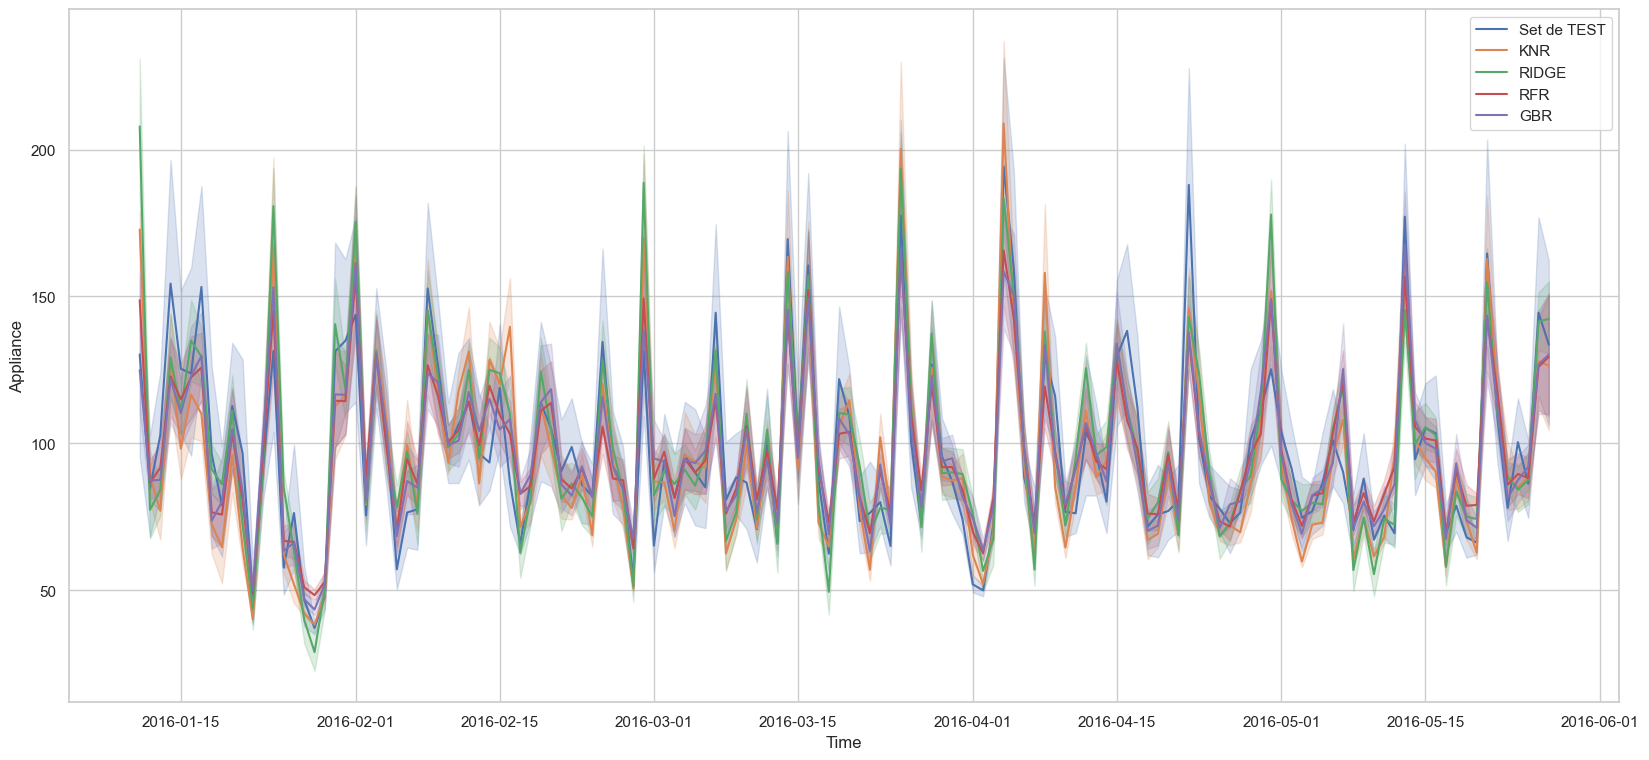

In [47]:
# Lineplot del conjunto de prueba que luego voy a comparar con los resultados de cada algoritmo 
fig, ax = plt.subplots()
fig.set_size_inches((20,9))
sns.lineplot(data=df_energia_hogar, x=X_test['day'], y=y_test, label='Set de TEST')
# MACHINE LEARNING
sns.lineplot(x=X_test['day'], y=df_predicciones_KNR['prediccion_KNR'], label='KNR')
sns.lineplot(x=X_test['day'], y=df_predicciones_RIDGE['prediccion_RIDGE'], label='RIDGE')
sns.lineplot(x=X_test['day'], y=df_predicciones_RFR['prediccion_RFR'], label='RFR')
sns.lineplot(x=X_test['day'], y=df_predicciones_GBR['prediccion_GBR'], label='GBR')

# DEEP LEARNING:
# sns.lineplot(x=X_test['day'], y=df_predicciones_RFR['prediccion_RFR'], label='RFR')
# sns.lineplot(x=X_test['day'], y=df_predicciones_LSTM['prediccion_RFR'], label='LSTM')
ax.set_ylabel('Appliance')
ax.set_xlabel('Time')
# plt.xlim(0, 200)


#### **Comparacion de metricas de cada modelo**

In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math 


Metricas = ['MAE', 'MSE', 'RMSE']
#---------------------------------------------------------------------------------
KNR = [mean_absolute_error(y_test, predicciones_KNR), 
                       mean_squared_error(y_test, predicciones_KNR), 
                       math.sqrt(mean_squared_error(y_test, predicciones_KNR))]
#---------------------------------------------------------------------------------
Ridge = [mean_absolute_error(y_test, predicciones_RIDGE), 
         mean_squared_error(y_test, predicciones_RIDGE), 
         math.sqrt(mean_squared_error(y_test, predicciones_RIDGE))]
#---------------------------------------------------------------------------------
RFR = [mean_absolute_error(y_test, predicciones_RFR), 
                         mean_squared_error(y_test, predicciones_RFR), 
                         math.sqrt(mean_squared_error(y_test, predicciones_RFR))]
#---------------------------------------------------------------------------------
GBR = [mean_absolute_error(y_test, predicciones_GBR), 
                             mean_squared_error(y_test, predicciones_GBR), 
                             math.sqrt(mean_squared_error(y_test, predicciones_GBR))]

df = pd.DataFrame()
df['Metricas'] = Metricas
df['KNeighborsRegressor'] = KNR
df['Ridge'] = Ridge
df['RandomForestRegressor'] = RFR
df['GradientBoostingRegressor'] = GBR


display(df)

,Metricas,KNeighborsRegressor,Ridge,RandomForestRegressor,GradientBoostingRegressor
0,MAE,42.868414,52.100147,38.824037,37.982359
1,MSE,7278.262315,7804.646796,6095.160713,5990.860135
2,RMSE,85.312732,88.343912,78.071510,77.400647


# Glosario de variables:  

Appliances: energy use in Wh of appliances (variable target) 'Consumo de Aparatos Electronicos'   
lights: energy use of light fixtures in the house in Wh    
T1: Temperature in kitchen area, in Celsius  
RH_1:Humidity in kitchen area, in %  
T2:Temperature in living room area, in Celsius  
RH_2: Humidity in living room area, in %  
T3: Temperature in laundry room area  
RH_3: Humidity in laundry room area, in %  
T4: Temperature in office room, in Celsius  
RH_4: Humidity in office room, in %  
T5: Temperature in bathroom, in Celsius  
RH_5: Humidity in bathroom, in %  
T6: Temperature outside the building (north side), in Celsius  
RH_6: Humidity outside the building (north side), in %  
T7: Temperature in ironing room , in Celsius  
RH_7: Humidity in ironing room, in %  
T8:  Temperature in teenager room 2, in Celsius  
RH_8:  Humidity in teenager room 2, in %  
T9:  Temperature in parents room, in Celsius   
RH_9: Humidity in parents room, in %   
T_out: Temperature outside (from Chievres weather station), in Celsius  
Press_mm_hg: Pressure (from Chievres weather station), in mm Hg  
RH_out: Humidity outside (from Chievres weather station), in %  
Windspeed: Wind speed (from Chievres weather station), in m/s  
Visibility: Visibility (from Chievres weather station), in km  
Tdewpoint: Tdewpoint (from Chievres weather station), Â°C  
rv1: Random variable 1, nondimensional  
rv2: Random variable 2, nondimensional   


**Planta Baja:**  
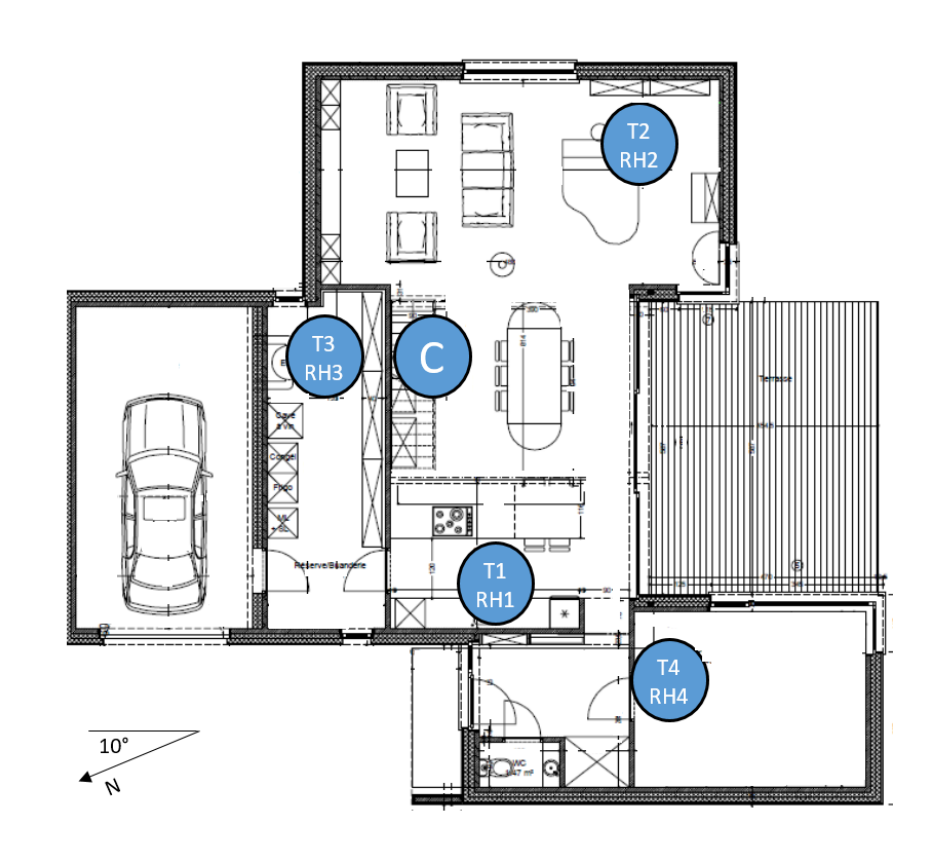  


**Planta Alta:**  
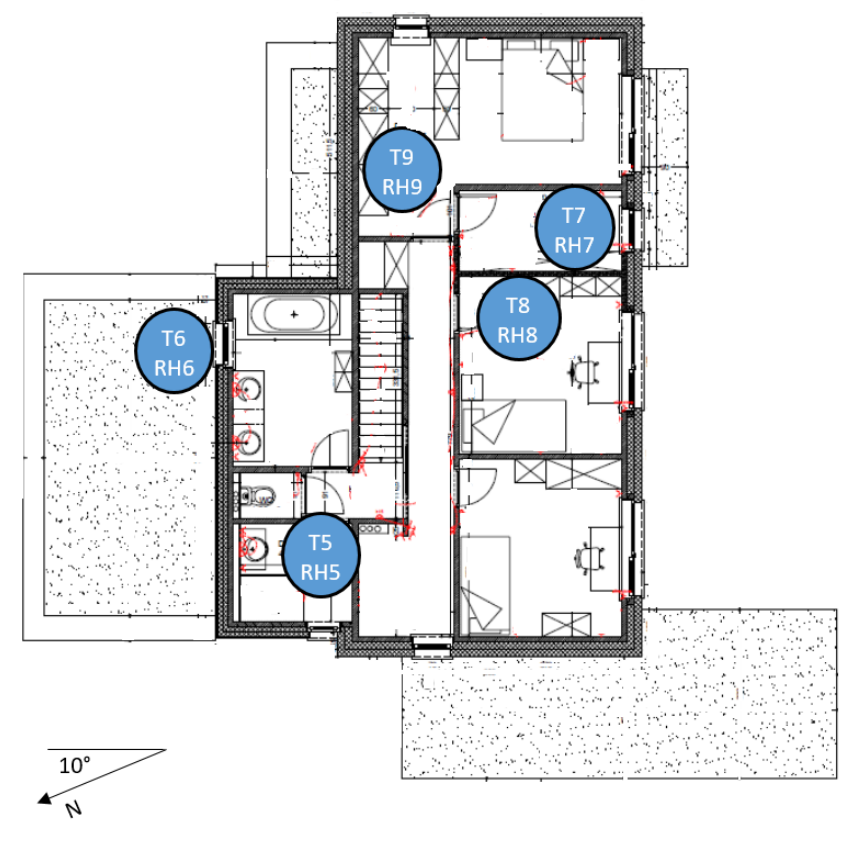


